Author: **Vi-n1**
---
License: **MIT License**


# Fraud Detection


## Introdução e Objetivo

Um dos grandes desafios para as instituições bancárias é evitar que fraudes ocorram. Normalmente, são utilizados algoritmos de aprendizado de máquina para desenvolver sistemas de **IA** e auxiliar na detecção de fraudes.

O objetivo desta pesquisa é utilizar **deep learning** e comparar seus resultados com os de outros algoritmos de aprendizado, como o **Naive Bayes**, a **Regressão Logística** e a **floresta aleatória**.

## Sobre os dados

Este conjunto de dados contém transações de cartão de crédito realizadas por titulares europeus em setembro de 2013. Ele registra transações de dois dias, com apenas 492 casos de fraude em 284.807 transações, tornando-o altamente desbalanceado. As características são principalmente numéricas, resultantes de uma transformação PCA, exceto 'Time' (tempo) e 'Amount' (valor). 'Class' é a variável de resposta, indicando fraude (1) ou não (0).


## Importação de Bibliotecas

In [1]:
import pandas as pd  # Manipulação e análise de dados estruturados
import numpy as np  # Operações numéricas eficientes em arrays

import seaborn as sns  # Visualização de dados baseada no matplotlib
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações de dados

import torch  # Biblioteca de machine learning para PyTorch
from torch import nn  # Construção de redes neurais em PyTorch
import torch.optim as optim  # Otimização em PyTorch

from skorch import NeuralNetBinaryClassifier  # Wrapper para usar redes neurais de PyTorch com scikit-learn
from sklearn.ensemble import RandomForestClassifier  # Classificador de florestas aleatórias
from sklearn.naive_bayes import GaussianNB  # Classificador Naive Bayes Gaussiano
from sklearn.linear_model import LogisticRegression  # Regressão logística

from sklearn.model_selection import cross_val_score, train_test_split  # Validação cruzada e divisão de dados em treino e teste
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay  # Métricas e visualizações de avaliação

from sklearn.preprocessing import StandardScaler  # Padronização dos dados
from imblearn.over_sampling import SMOTE  # Sobremostragem para lidar com desequilíbrio de classes

from scipy.stats import anderson  # Teste Anderson-Darling para verificar a normalidade dos dados

## Obtenção e Preparação dos Dados

In [2]:
# Base de dados
data = pd.read_csv('base_dados/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# A variável 'Time' não será utilizada, portanto, é necessário excluí-la
data.drop(columns='Time', inplace=True)

In [4]:
data.isna().sum().to_frame('Valores faltantes')

,Valores faltantes
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [5]:
count_values, columns = data.shape
print(f'Quantidade de registros = {count_values}\nQuantidade de colunas = {columns}')

Quantidade de registros = 284807
Quantidade de colunas = 30


In [6]:
# Estatísticas descritivas que resumem a tendência central, dispersão e forma da distribuição dos dados
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


padronizado a variável "Amount"

In [7]:
# Faz uma cópia dos dados para evitar alterar o conjunto de dados original
new_data = data.copy()

# Inicializa um objeto StandardScaler para padronizar a variável 'Amount'
scaler_amount = StandardScaler()

# Padroniza a variável 'Amount' e substitui os valores originais pelos valores padronizados
new_data['Amount'] = scaler_amount.fit_transform(new_data['Amount'].values.reshape(-1, 1))

In [8]:
print('variável "Amount" padronizada')
new_data.describe()

variável "Amount" padronizada


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.913952e-17,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


## Exploração de Dados

In [9]:
# Define o tema padrão de plotagem para os gráficos seaborn
sns.set_theme()

In [10]:
columns = new_data.columns
    
for col in columns:
    # Realiza o teste de Anderson-Darling para a coluna atual
    result = anderson(new_data[col].values)

    # Verifica se os dados seguem uma distribuição normal com base no resultado do teste
    if result.statistic < result.critical_values[2]:
        print(f'{col}: A hipótese nula (H0) aceita, os dados seguem uma distribuição normal.')
    else:
        print(f'{col}: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.')


V1: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V2: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V3: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V4: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V5: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V6: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V7: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V8: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V9: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V10: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V11: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V12: A hipótese nula (H0) rejeitada, os dados não seguem uma distribuição normal.
V13: A hipótese nula (H0)

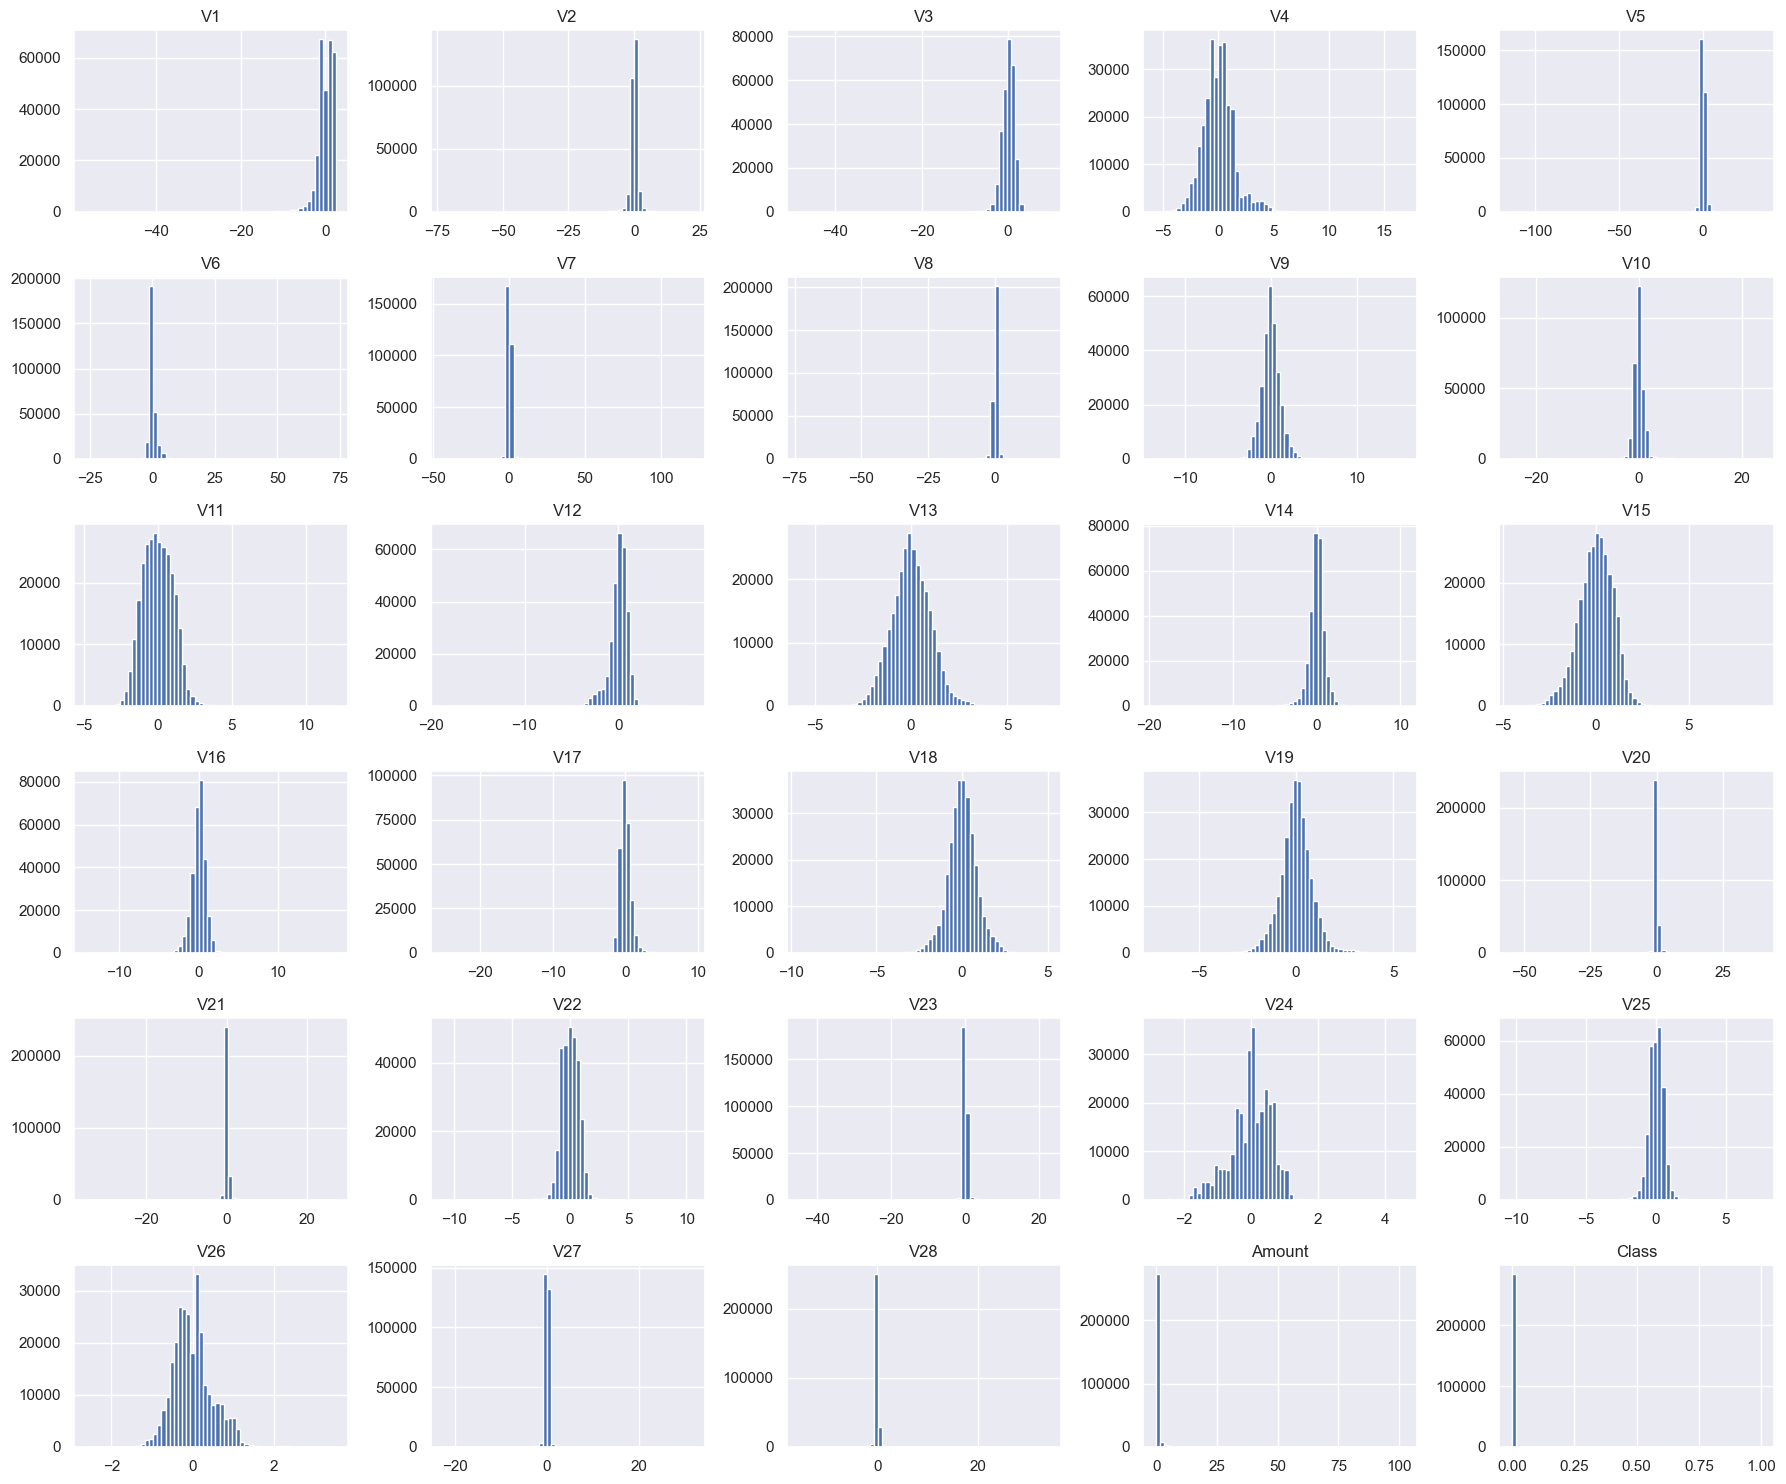

In [11]:
# Plota histogramas para todas as colunas do DataFrame
new_data.hist(bins=60, figsize=(18, 15))
plt.tight_layout()

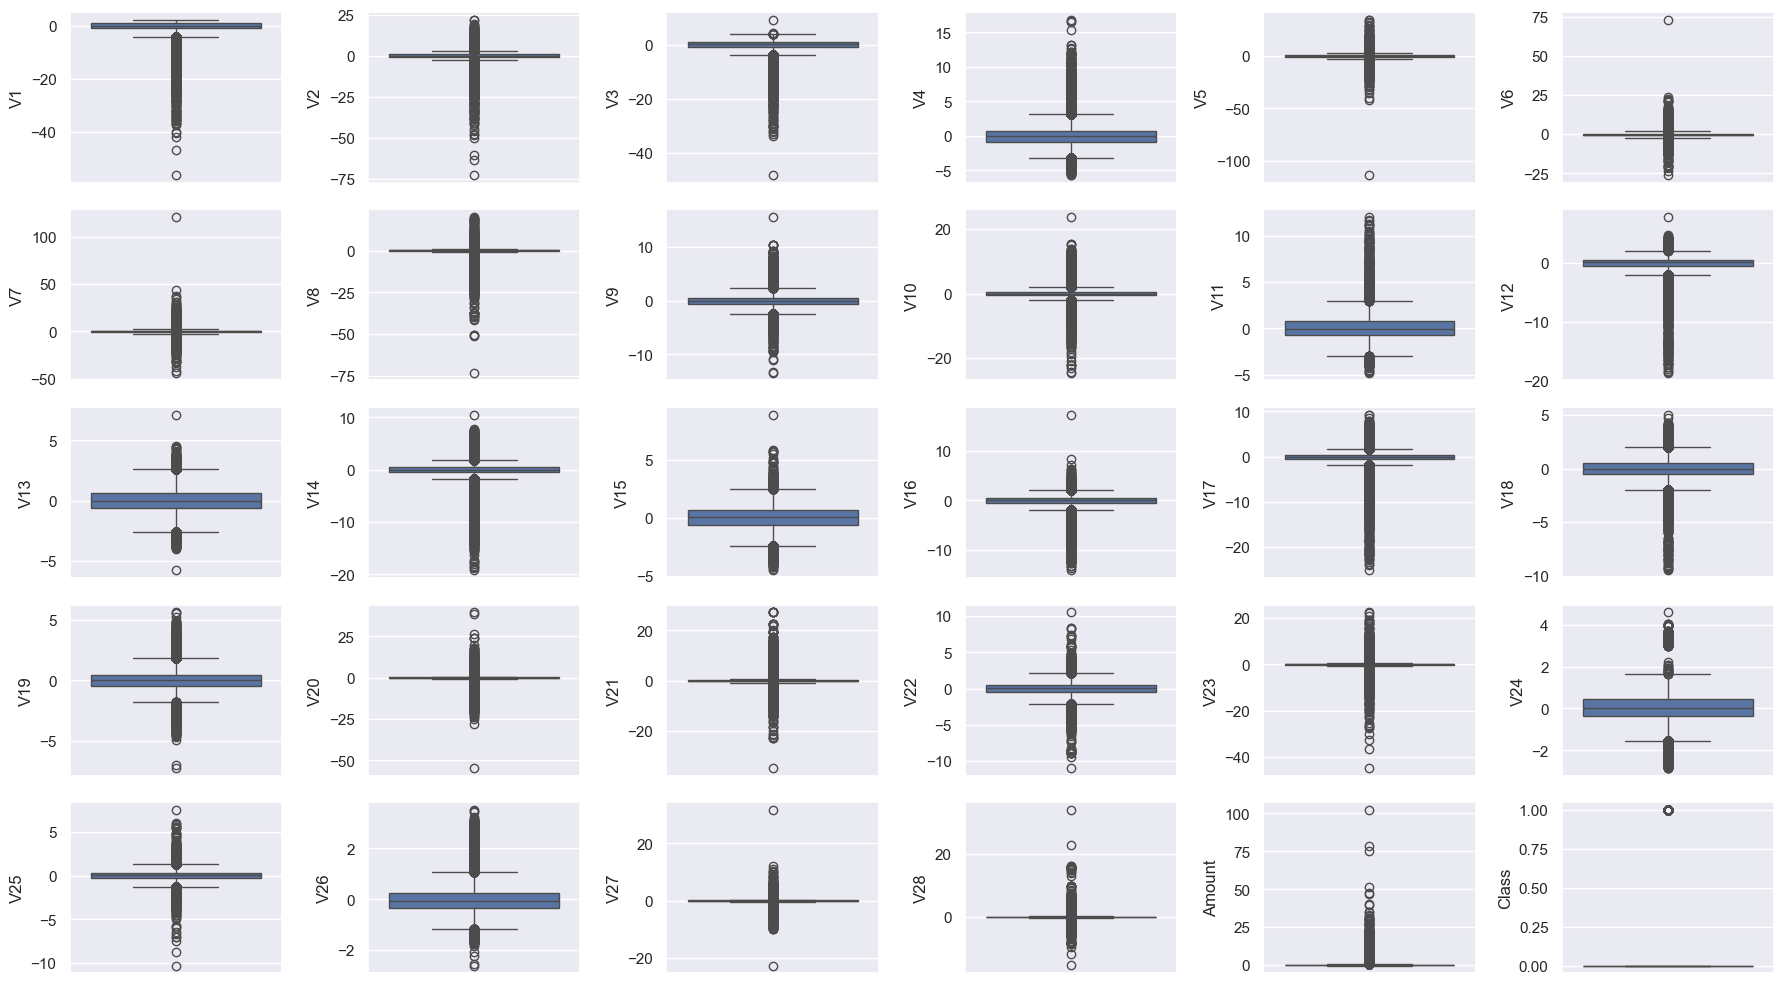

In [12]:
# Cria uma figura com subplots organizados em uma grade de 5 linhas por 6 colunas, com tamanho de 18x10
fig, ax = plt.subplots(nrows=5, ncols=6, figsize=(18, 10))

for i, col in enumerate(new_data.columns):
    # Calcula o índice da linha e da coluna para o subplot atual
    row_index = i // 6
    col_index = i % 6
    
    # Plota o boxplot para a coluna atual no subplot correspondente
    sns.boxplot(new_data[col], ax=ax[row_index][col_index])

# Ajusta o layout para melhor visualização dos subplots
fig.tight_layout()

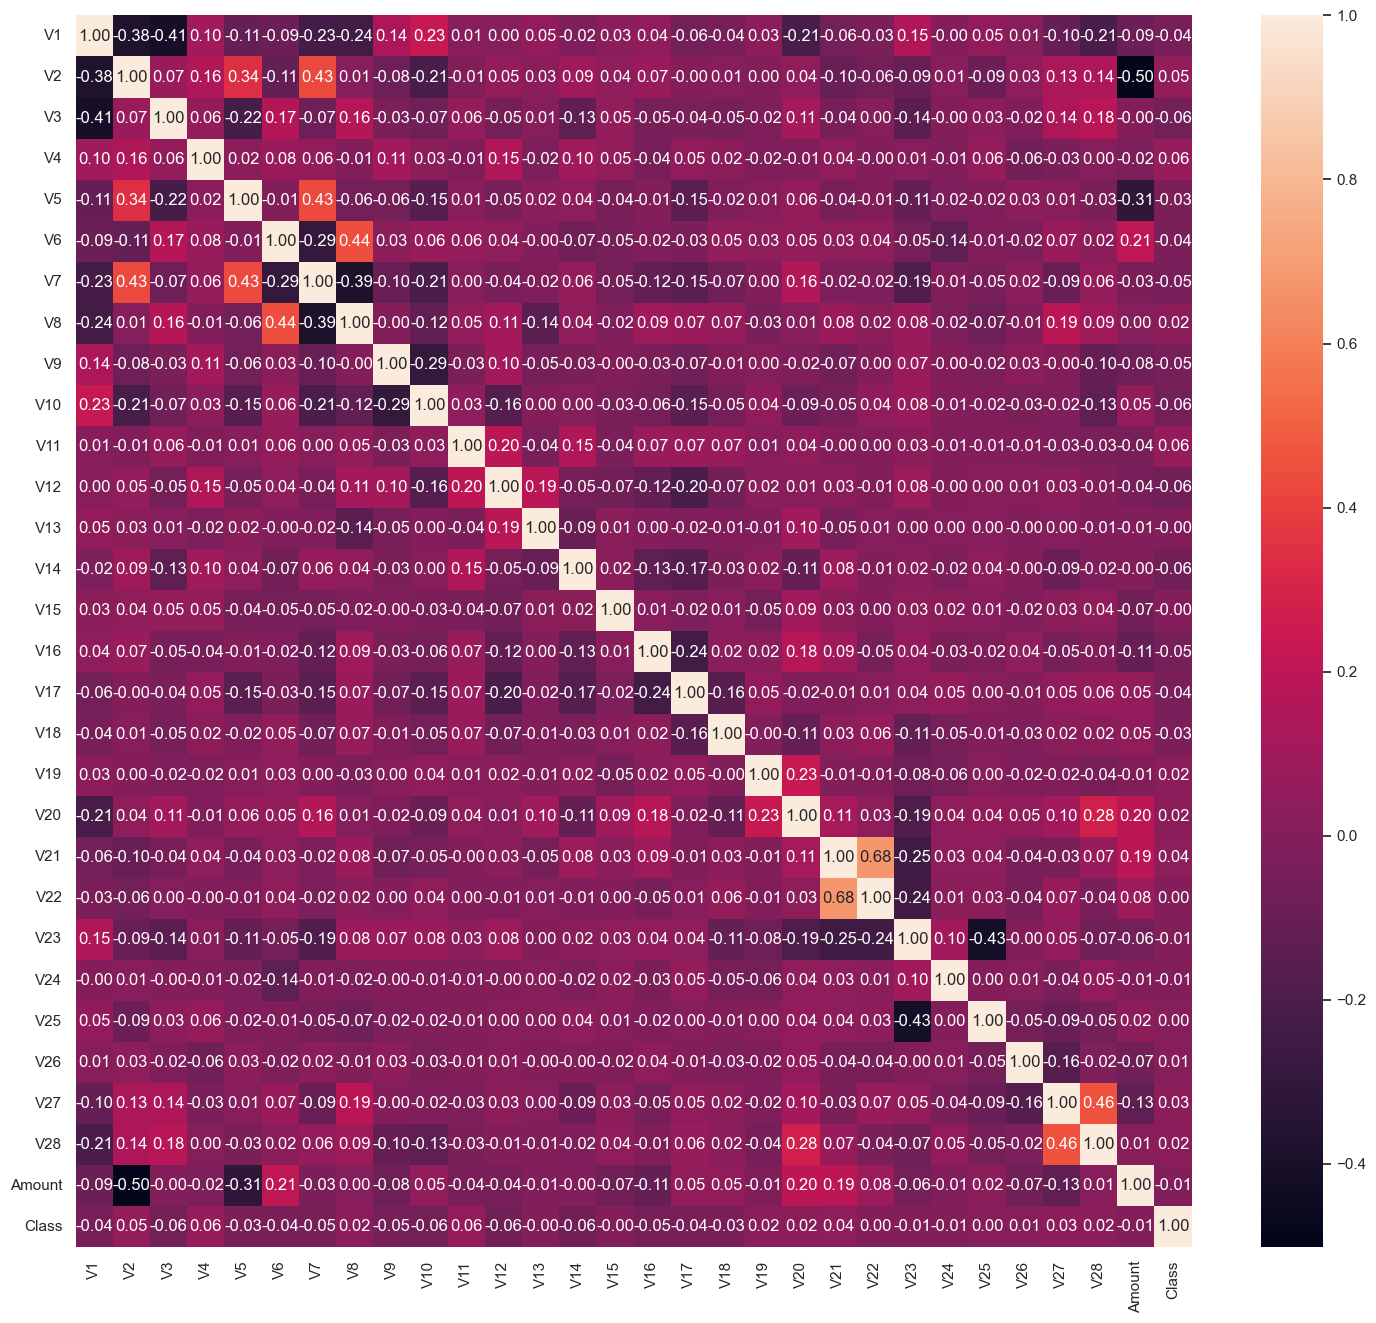

In [13]:
plt.figure(figsize=(18, 16))

# Plota um mapa de calor da matriz de correlação de Spearman dos dados em 'new_data'
sns.heatmap(new_data.corr(method='spearman'), annot=True, fmt='.2f');

## Modelagem

In [14]:
SEED = 321

In [15]:
# Define a semente de geração de números aleatórios para numpy e torch para garantir reprodutibilidade
np.random.seed(SEED)
torch.manual_seed(SEED);

In [16]:
# Define o dispositivo de execução como 'cuda' se estiver disponível, caso contrário, utiliza 'cpu'
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Obtém o nome do dispositivo CUDA atual se 'cuda' estiver disponível, caso contrário, retorna o nome do dispositivo 'cpu'
torch.cuda.get_device_name(device=device)

'NVIDIA GeForce RTX 3060'

In [17]:
def describe_dataset_split(X_train: np.ndarray, y_train: np.ndarray,
                           X_test: np.ndarray, y_test: np.ndarray) -> pd.DataFrame:
    """Descreve a divisão do conjunto de dados em treino e teste.

    Esta função cria um DataFrame que apresenta a distribuição das classes
    e o total de amostras nos conjuntos de treino e teste.

    Args:
        X_train (np.ndarray): Array de features do conjunto de treino.
        y_train (np.ndarray): Array de rótulos do conjunto de treino.
        X_test (np.ndarray): Array de features do conjunto de teste.
        y_test (np.ndarray): Array de rótulos do conjunto de teste.

    Returns:
        pd.DataFrame: DataFrame contendo a contagem de amostras para cada classe e o total
                      de amostras nos conjuntos de treino e teste.
    
    O DataFrame retornado possui a seguinte estrutura:
        - Índices: 'Classe 0', 'Classe 1', 'Total'
        - Colunas: 'Treino', 'Teste'
    """
    df = pd.DataFrame(columns=['Treino', 'Teste'],index=['Classe 0', 'Classe 1', 'Total'])
    df['Treino'] = [(y_train == 0).sum(), (y_train == 1).sum(), X_train.shape[0]]
    df['Teste'] = [(y_test == 0).sum(), (y_test == 1).sum(), X_test.shape[0]]
    return df

In [18]:
class Classifier_torch(nn.Module):
    """Classificador binário com 2 camadas ocultas, cada uma contendo 15 neurônios.

    O modelo é implementado usando PyTorch e consiste nas seguintes camadas:
    - Camada de entrada com 29 características
    - Primeira camada oculta com 15 neurônios, ativação ReLU e dropout
    - Segunda camada oculta com 15 neurônios, ativação ReLU e dropout
    - Camada de saída com 1 neurônio
    """
    
    def __init__(self):
        """Inicializa uma instância de Classifier_torch.

        Define a arquitetura do modelo com duas camadas ocultas e uma camada de saída.
        Cada camada oculta usa ativação ReLU e dropout para regularização.
        """
        super().__init__()
        
        self.dense0 = nn.Linear(in_features=29, out_features=15)
        nn.init.uniform_(self.dense0.weight)
        self.activation0 = nn.ReLU()
        self.dropout0 = nn.Dropout(0.20)
        
        self.dense1 = nn.Linear(in_features=15, out_features=15)
        nn.init.uniform_(self.dense1.weight)
        self.activation1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.20)
        
        self.dense2 = nn.Linear(in_features=15, out_features=1)
        nn.init.uniform_(self.dense2.weight)
        
    def forward(self, X):
        """Realiza o treinamento do modelo.

        Args:
            X (torch.Tensor): O tensor de entrada.

        Returns:
            torch.Tensor: O tensor de saída.
        """
        X = self.dense0(X)
        X = self.activation0(X)
        X = self.dropout0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dropout1(X)
        X = self.dense2(X)
        return X

### Com a base de dados desbalanceada

In [19]:
# Extrai as features (X) e os rótulos (y) do DataFrame 'new_data'
X = new_data.drop('Class', axis=1).values
y = new_data['Class'].values

# O conjunto de teste terá 30% dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Descreve a divisão do conjunto de dados em treino e teste
describe_dataset_split(X_train, y_train, X_test, y_test)

,Treino,Teste
Classe 0,199024,85291
Classe 1,340,152
Total,199364,85443


In [20]:
# Converte os arrays numpy para tensores do PyTorch e move os tensores para o dispositivo (cpu ou cuda)
X_tensor = torch.tensor(X, dtype=torch.float32, device=device)
y_tensor = torch.tensor(y, dtype=torch.float32, device=device)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)


print(f'{X_train_tensor.device = }')
print(f'{y_train_tensor.device = }')
print(f'{X_test_tensor.device = }')
print(f'{y_test_tensor.device = }')

X_train_tensor.device = device(type='cuda', index=0)
y_train_tensor.device = device(type='cuda', index=0)
X_test_tensor.device = device(type='cuda', index=0)
y_test_tensor.device = device(type='cuda', index=0)


#### DNN(Deep Neural Network)

In [21]:
# Define um classificador de rede neural binária usando o skorch
nn_clf = NeuralNetBinaryClassifier(
    module=Classifier_torch,  # Modelo de rede neural definido anteriormente
    criterion=nn.BCEWithLogitsLoss,  # Função de perda para classificação binária
    optimizer=optim.Adam,  # Otimizador Adam para atualização dos pesos da rede
    lr=0.001,  # Taxa de aprendizado
    optimizer__weight_decay=0.0001,  # Peso da penalidade L2 (regularização)
    max_epochs=4,  # Número máximo de épocas de treinamento
    batch_size=10,  # Tamanho do lote para o treinamento
    train_split=False,  # Indica que o conjunto de validação não será utilizado
    device=device  # Dispositivo de execução (cpu ou cuda)
    )

In [22]:
# Treina o classificador
nn_clf.fit(X_train_tensor, y_train_tensor)

  epoch    train_loss      dur
-------  ------------  -------
      1        0.5189  51.6148
      2        0.0065  48.9733
      3        0.0046  48.7106
      4        0.0042  48.9091


<class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=Classifier_torch(
    (dense0): Linear(in_features=29, out_features=15, bias=True)
    (activation0): ReLU()
    (dropout0): Dropout(p=0.2, inplace=False)
    (dense1): Linear(in_features=15, out_features=15, bias=True)
    (activation1): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
    (dense2): Linear(in_features=15, out_features=1, bias=True)
  ),
)

In [23]:
# Obtém as probabilidades previstas
y_pred_proba_nn = nn_clf.predict_proba(X_test_tensor)

# Obtém as classes previstas
y_pred_nn = nn_clf.predict(X_test_tensor)

#### Random Forest(Floresta aleatória)

In [24]:
# Define um classificador de floresta aleatória
rf = RandomForestClassifier(
    criterion='entropy',  # Critério de divisão para medir a qualidade das divisões
    random_state=SEED,  # Semente aleatória para garantir reprodutibilidade
    n_jobs=-3  # Número de trabalhos em paralelo para execução
)

In [25]:
# Treina o classificador
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-3, random_state=321)

In [26]:
# Obtém as classes previstas
y_pred_rf = rf.predict(X_test)

#### Naive Bayes

In [27]:
# Define um classificador Naive Bayes Gaussiano
nb = GaussianNB()

In [28]:
# Treina o classificador
nb.fit(X_train, y_train)

GaussianNB()

In [29]:
# Obtém as classes previstas
y_pred_nb = nb.predict(X_test)

#### Regressão logística binária

In [30]:
# Define um classificador de regressão logística
lr = LogisticRegression(n_jobs=-3)

In [31]:
# Treina o classificador
lr.fit(X_train, y_train)

LogisticRegression(n_jobs=-3)

In [32]:
# Obtém as classes previstas
y_pred_lr = lr.predict(X_test)

### Com a base de dados balanceada(Metódo de sobreamostragem)

In [33]:
# Aplica a técnica de sobreamostragem SMOTE para lidar com o desequilíbrio de classes
sm = SMOTE(random_state=SEED)
X_smote, y_smote = sm.fit_resample(X, y)

# Divide os dados sobreamostrados em conjuntos de treino e teste
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote,
                                                                            test_size=0.3,
                                                                            random_state=SEED
                                                                            )

# Descreve a divisão do conjunto de dados sobreamostrado em treino e teste
describe_dataset_split(X_train_smote, y_train_smote, X_test_smote, y_test_smote)

,Treino,Teste
Classe 0,198994,85321
Classe 1,199047,85268
Total,398041,170589


In [34]:
# Converte os arrays numpy sobreamostrados para tensores do PyTorch e move os tensores para o dispositivo (cpu ou cuda)
X_train_smote_tensor = torch.tensor(X_train_smote, dtype=torch.float32, device=device)
X_test_smote_tensor = torch.tensor(X_test_smote, dtype=torch.float32, device=device)
y_train_smote_tensor = torch.tensor(y_train_smote, dtype=torch.float32, device=device)
y_test_smote_tensor = torch.tensor(y_test_smote, dtype=torch.float32, device=device)

print(f'{X_train_smote_tensor.device = }')
print(f'{y_train_smote_tensor.device = }')
print(f'{X_test_smote_tensor.device = }')
print(f'{y_test_smote_tensor.device = }')

X_train_smote_tensor.device = device(type='cuda', index=0)
y_train_smote_tensor.device = device(type='cuda', index=0)
X_test_smote_tensor.device = device(type='cuda', index=0)
y_test_smote_tensor.device = device(type='cuda', index=0)


#### DNN(Deep Neural Network)

In [35]:
# Define um classificador de rede neural binária usando o skorch para os dados sobreamostrados
nn_clf_smote = NeuralNetBinaryClassifier(
    module=Classifier_torch,  # Modelo
    criterion=nn.BCEWithLogitsLoss,  # Função de perda para classificação binária
    optimizer=optim.Adam,  # Otimizador Adam para atualização dos pesos da rede
    lr=0.001,  # Taxa de aprendizado
    optimizer__weight_decay=0.0001,  # Peso da penalidade L2 (regularização)
    max_epochs=4,  # Número máximo de épocas de treinamento
    batch_size=10,  # Tamanho do lote para o treinamento
    train_split=False,  # Indica que o conjunto de validação não será utilizado
    device=device  # Dispositivo de execução (cpu ou cuda)
)

In [36]:
# Treina o classificador de rede neural binária com os dados de treino sobreamostrados
nn_clf_smote.fit(X_train_smote_tensor, y_train_smote_tensor)

  epoch    train_loss      dur
-------  ------------  -------
      1        0.2481  98.1047
      2        0.0340  98.3817
      3        0.0293  92.6337
      4        0.0279  97.5536


<class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=Classifier_torch(
    (dense0): Linear(in_features=29, out_features=15, bias=True)
    (activation0): ReLU()
    (dropout0): Dropout(p=0.2, inplace=False)
    (dense1): Linear(in_features=15, out_features=15, bias=True)
    (activation1): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
    (dense2): Linear(in_features=15, out_features=1, bias=True)
  ),
)

In [37]:
# Obtém as probabilidades previstas pelo classificador de rede neural binária para o conjunto de teste sobreamostrado
y_pred_proba_nn_smote = nn_clf_smote.predict_proba(X_test_smote_tensor)

# Obtém as classes previstas pelo classificador de rede neural binária para o conjunto de teste sobreamostrado
y_pred_nn_smote = nn_clf_smote.predict(X_test_smote_tensor)

#### Random Forest(Floresta aleatória)

In [38]:
# Define um classificador de floresta aleatória para os dados sobreamostrados
rf_smote = RandomForestClassifier(
    criterion='entropy',  # Critério de divisão para medir a qualidade das divisões
    random_state=SEED,  # Semente aleatória para garantir reprodutibilidade
    n_jobs=-3  # Número de trabalhos em paralelo para execução
)

In [39]:
# Treina o classificador com os dados de treino sobreamostrados
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', n_jobs=-3, random_state=321)

In [40]:
# Obtém as classes previstas para o conjunto de teste sobreamostrado
y_pred_rf_smote = rf_smote.predict(X_test_smote)

#### Naive Bayes

In [41]:
# Define um classificador Naive Bayes Gaussiano para os dados sobreamostrados
nb_smote = GaussianNB()

In [42]:
# Treina o classificador com os dados de treino sobreamostrados
nb_smote.fit(X_train_smote, y_train_smote)

GaussianNB()

In [43]:
# Obtém as classes previstas para o conjunto de teste sobreamostrado
y_pred_nb_smote = nb_smote.predict(X_test_smote)

#### Regressão logística binária

In [44]:
# Define um classificador de regressão logística para os dados sobreamostrados
lr_smote = LogisticRegression(n_jobs=-3, random_state=SEED)

In [45]:
# Treina o classificador com os dados de treino sobreamostrados
lr_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(n_jobs=-3, random_state=321)

In [46]:
# Obtém as classes previstas para o conjunto de teste sobreamostrado
y_pred_lr_smote = lr_smote.predict(X_test_smote)

## Avaliação do Modelo

### DNN(Deep Neural Network)

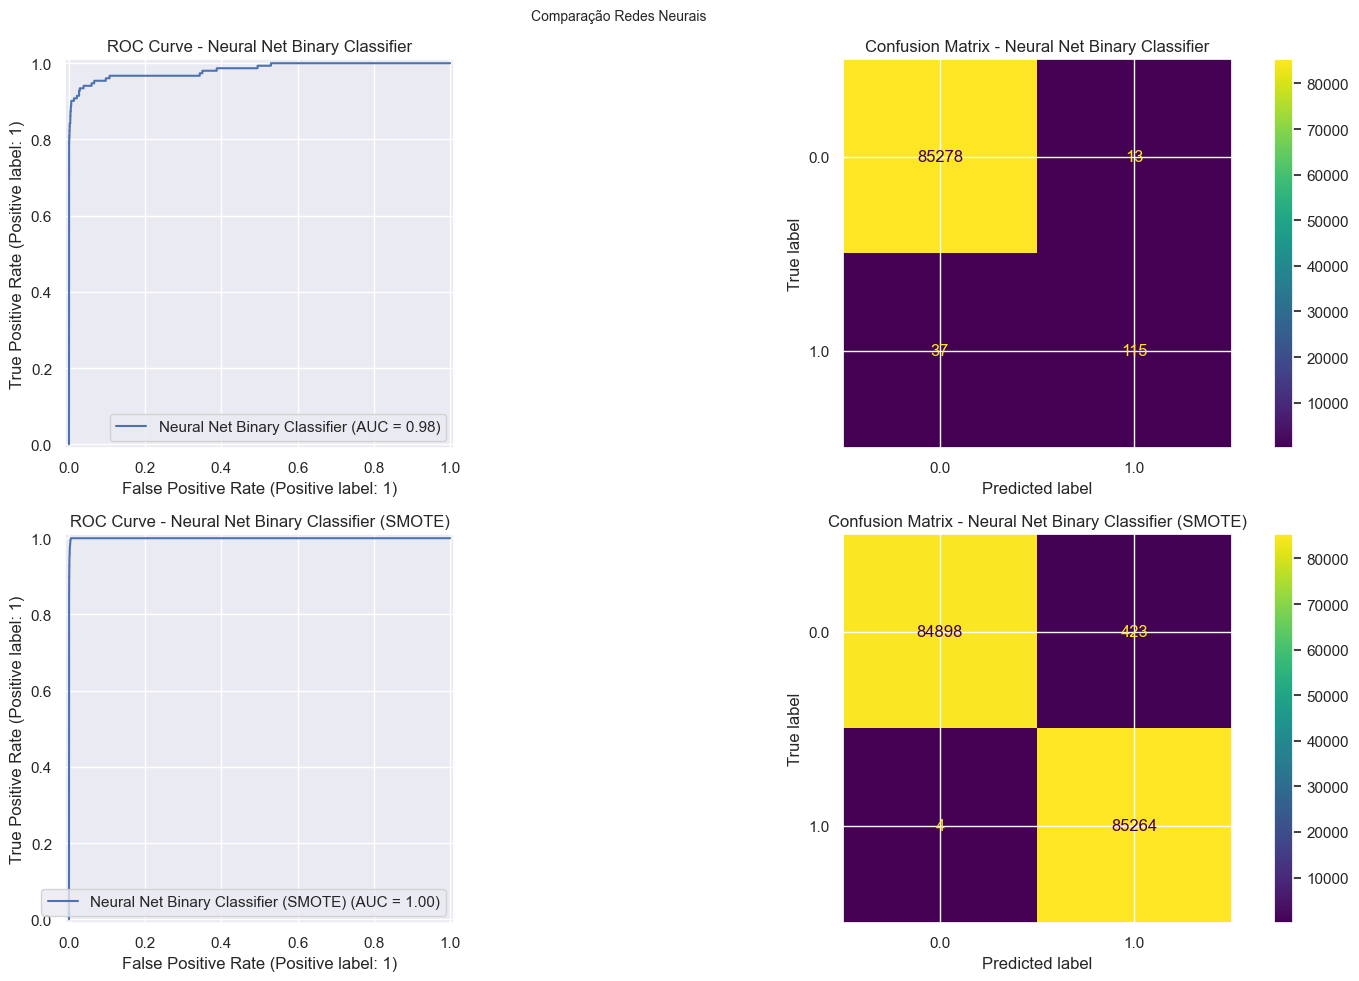

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle('Comparação Redes Neurais', fontsize=10)

RocCurveDisplay.from_predictions(y_test_tensor.cpu(), y_pred_proba_nn[:, 1], name='Neural Net Binary Classifier', ax=ax[0][0])
ConfusionMatrixDisplay.from_estimator(nn_clf, X_test_tensor.cpu(), y_test_tensor.cpu(), ax=ax[0][1]);
ax[0][0].set_title('ROC Curve - Neural Net Binary Classifier')
ax[0][1].set_title('Confusion Matrix - Neural Net Binary Classifier')

RocCurveDisplay.from_predictions(y_test_smote_tensor.cpu(), y_pred_proba_nn_smote[:, 1], name='Neural Net Binary Classifier (SMOTE)', ax=ax[1][0])
ConfusionMatrixDisplay.from_estimator(nn_clf_smote, X_test_smote_tensor.cpu(), y_test_smote_tensor.cpu(), ax=ax[1][1]);
ax[1][0].set_title('ROC Curve - Neural Net Binary Classifier (SMOTE)')
ax[1][1].set_title('Confusion Matrix - Neural Net Binary Classifier (SMOTE)')

fig.tight_layout()

In [48]:
print('Neural Net Binary Classifier\n', classification_report(y_test_tensor.cpu(), y_pred_nn, digits=4))
print()
print('Neural Net Binary Classifier (SMOTE)\n', classification_report(y_test_smote_tensor.cpu(), y_pred_nn_smote, digits=4))

Neural Net Binary Classifier
               precision    recall  f1-score   support

         0.0     0.9996    0.9998    0.9997     85291
         1.0     0.8984    0.7566    0.8214       152

    accuracy                         0.9994     85443
   macro avg     0.9490    0.8782    0.9106     85443
weighted avg     0.9994    0.9994    0.9994     85443


Neural Net Binary Classifier (SMOTE)
               precision    recall  f1-score   support

         0.0     1.0000    0.9950    0.9975     85321
         1.0     0.9951    1.0000    0.9975     85268

    accuracy                         0.9975    170589
   macro avg     0.9975    0.9975    0.9975    170589
weighted avg     0.9975    0.9975    0.9975    170589



**Interpretação e Comparação**

**Precisão (Precision):**

- O modelo sem SMOTE tem uma precisão muito alta para a classe 0 (0.9996) e relativamente alta para a classe 1 (0.8984). O modelo com SMOTE, por outro lado, apresenta precisão quase perfeita para ambas as classes (1.0000 para a classe 0 e 0.9951 para a classe 1).

**Recall (Sensibilidade):**

- O recall para a classe 1 no modelo com SMOTE é perfeito (1.0000), enquanto no modelo sem SMOTE é significativamente menor (0.7566). O modelo com SMOTE também mantém um recall muito alto para a classe 0 (0.9950).

**F1-Score:**

- O F1-score para a classe 1 é muito melhor no modelo com SMOTE (0.9975) em comparação ao modelo sem SMOTE (0.8214), indicando um melhor equilíbrio entre precisão e recall. O F1-score para a classe 0 também é ligeiramente menor no modelo com SMOTE (0.9975) em comparação ao modelo sem SMOTE (0.9997), mas ainda extremamente alto.

**Acurácia (Accuracy):**

- A acurácia global do modelo sem SMOTE (0.9994) é ligeiramente inferior à do modelo com SMOTE (0.9975), mas ainda é muito alta. A diferença é principalmente devido ao aumento de falsos positivos ou negativos resultantes do equilíbrio das classes.

**Métricas Macro e Weighted Average:**

- As médias macro e ponderadas (weighted avg) são quase perfeitas para o modelo com SMOTE, indicando um desempenho geral excelente e equilibrado entre as classes. No modelo sem SMOTE, as médias macro são menores, especialmente em recall e F1-score, refletindo o desempenho inferior na classe minoritária.

**Conclusão**

O modelo de Neural Net Binary Classifier com SMOTE supera o modelo sem SMOTE em termos de recall e F1-score para a classe minoritária (classe 1), apresentando um equilíbrio muito melhor entre precisão e recall. Embora a acurácia geral do modelo com SMOTE seja ligeiramente inferior, as métricas de precisão, recall e F1-score quase perfeitas indicam que ele é muito mais eficaz em identificar corretamente ambas as classes. O uso do SMOTE melhora significativamente a capacidade do modelo de lidar com o desbalanceamento das classes, resultando em um desempenho geral mais equilibrado e robusto.

### Random Forest(Floresta aleatória)

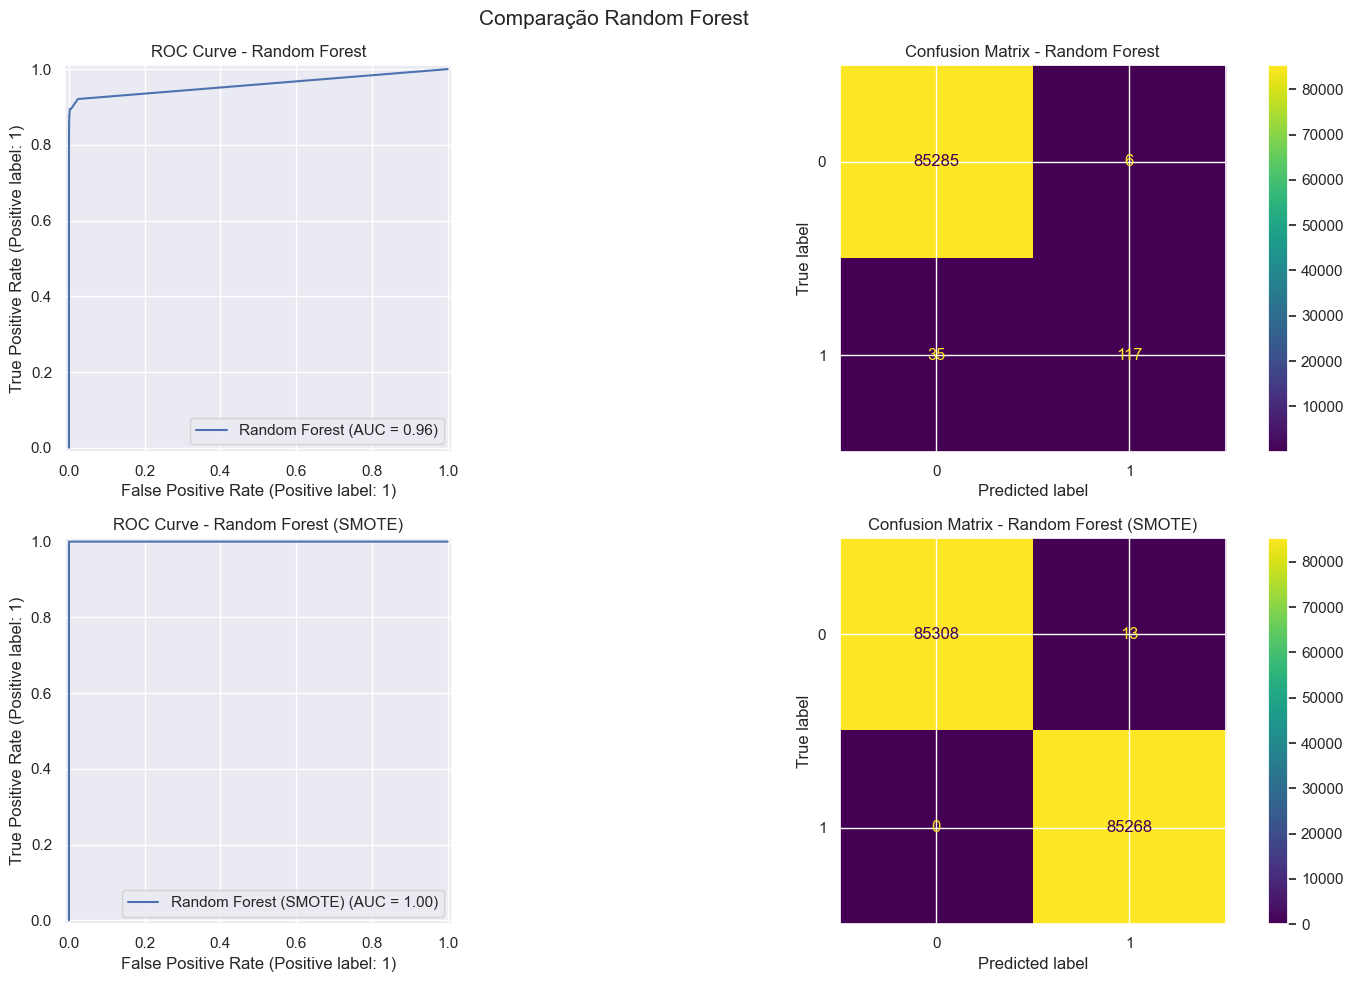

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle('Comparação Random Forest', fontsize=15)

RocCurveDisplay.from_estimator(rf, X_test, y_test, name='Random Forest', ax=ax[0][0])
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax[0][1]);
ax[0][0].set_title('ROC Curve - Random Forest')
ax[0][1].set_title('Confusion Matrix - Random Forest')

RocCurveDisplay.from_estimator(rf_smote, X_test_smote, y_test_smote, name='Random Forest (SMOTE)', ax=ax[1][0])
ConfusionMatrixDisplay.from_estimator(rf_smote, X_test_smote, y_test_smote, ax=ax[1][1]);
ax[1][0].set_title('ROC Curve - Random Forest (SMOTE)')
ax[1][1].set_title('Confusion Matrix - Random Forest (SMOTE)')

fig.tight_layout()

In [50]:
print('Random Forest\n', classification_report(y_test, y_pred_rf, digits=4))
print()
print('Random Forest (SMOTE)\n', classification_report(y_test_smote, y_pred_rf_smote, digits=4))

Random Forest
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     85291
           1     0.9512    0.7697    0.8509       152

    accuracy                         0.9995     85443
   macro avg     0.9754    0.8848    0.9253     85443
weighted avg     0.9995    0.9995    0.9995     85443


Random Forest (SMOTE)
               precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     85321
           1     0.9998    1.0000    0.9999     85268

    accuracy                         0.9999    170589
   macro avg     0.9999    0.9999    0.9999    170589
weighted avg     0.9999    0.9999    0.9999    170589



**Interpretação e Comparação**

**Precisão (Precision):**

- O modelo com SMOTE alcança uma precisão praticamente perfeita (1.0000 para a classe 0 e 0.9998 para a classe 1), enquanto o modelo sem SMOTE apresenta uma precisão ligeiramente menor para a classe 1 (0.9512).

**Recall (Sensibilidade):**

- O recall para a classe 1 no modelo com SMOTE é perfeito (1.0000), enquanto no modelo sem SMOTE é consideravelmente menor (0.7697). Isso indica que o modelo com SMOTE é muito melhor em identificar todos os casos da classe 1.

**F1-Score:**

- O F1-score, que é a média harmônica entre precisão e recall, é praticamente perfeito no modelo com SMOTE (0.9999 para ambas as classes), indicando um excelente equilíbrio entre precisão e recall. No modelo sem SMOTE, o F1-score para a classe 1 é significativamente menor (0.8509), mostrando que o modelo não é tão eficaz em equilibrar precisão e recall para a classe minoritária.

**Acurácia (Accuracy):**

- A acurácia global do modelo com SMOTE (0.9999) é ligeiramente superior à do modelo sem SMOTE (0.9995). Embora a diferença pareça pequena, ela é significativa dado o tamanho do conjunto de dados.

**Métricas Macro e Weighted Average:**

- As médias macro e ponderadas (weighted avg) são quase perfeitas para o modelo com SMOTE, indicando um excelente desempenho geral e equilíbrio entre as classes. No modelo sem SMOTE, essas métricas são menores, especialmente a macro average, refletindo o desempenho inferior na classe minoritária.

**Conclusão**

O modelo de Random Forest com SMOTE supera o modelo sem SMOTE em todas as métricas de desempenho, especialmente na capacidade de identificar corretamente a classe minoritária (classe 1). Isso se reflete em métricas de precisão, recall e F1-score quase perfeitas. O uso do SMOTE (Synthetic Minority Over-sampling Technique) claramente melhorou a capacidade do modelo de lidar com o desbalanceamento das classes, resultando em um desempenho geral muito superior.

### Naive Bayes

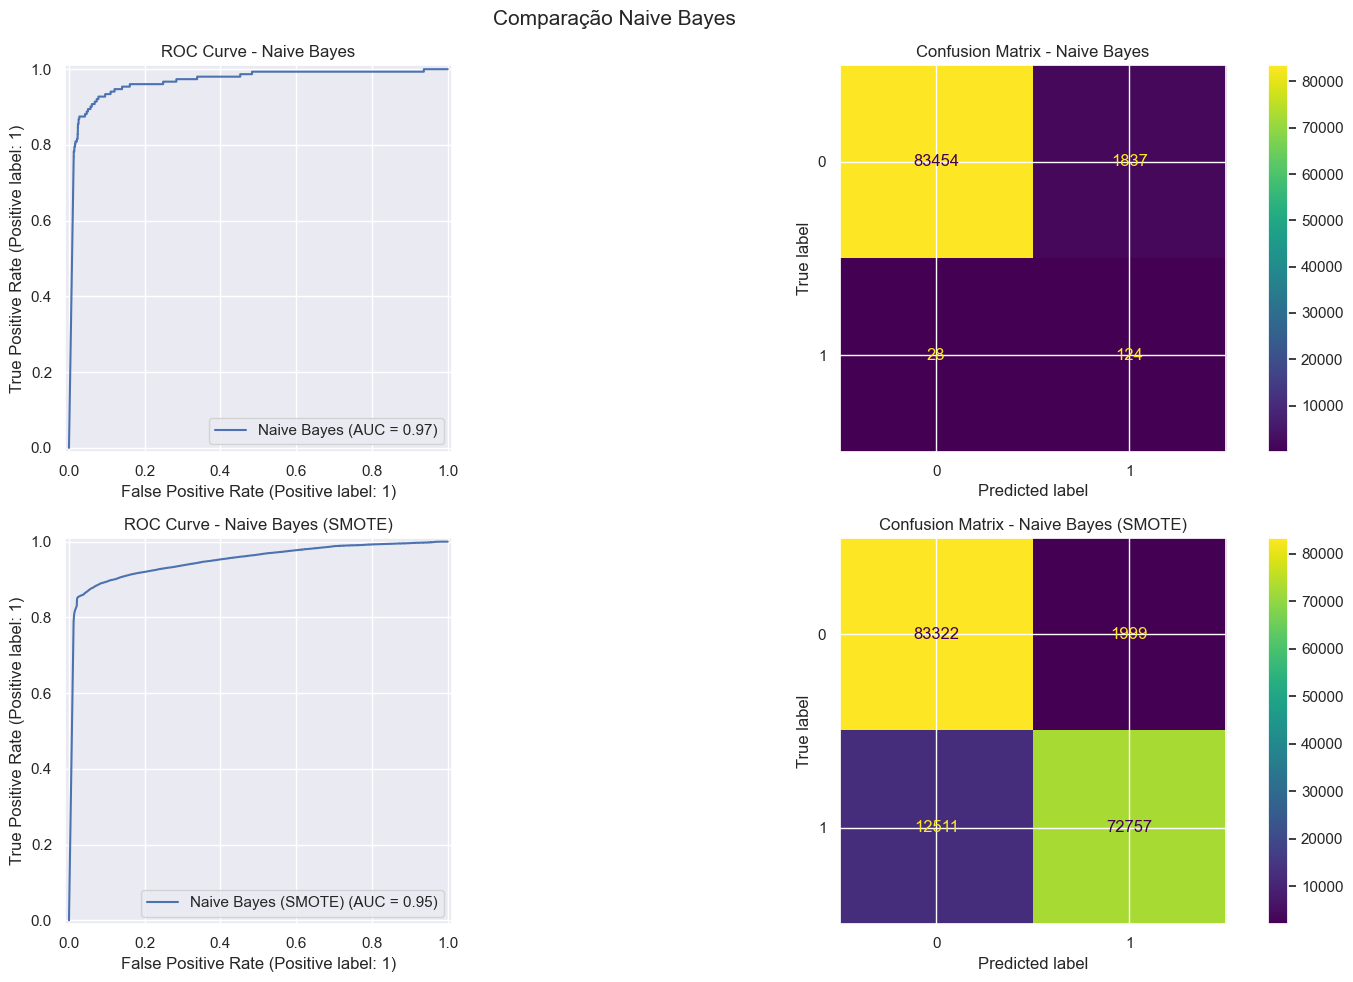

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle('Comparação Naive Bayes', fontsize=15)

RocCurveDisplay.from_estimator(nb, X_test, y_test, name='Naive Bayes', ax=ax[0][0])
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, ax=ax[0][1]);
ax[0][0].set_title('ROC Curve - Naive Bayes')
ax[0][1].set_title('Confusion Matrix - Naive Bayes')

RocCurveDisplay.from_estimator(nb_smote, X_test_smote, y_test_smote, name='Naive Bayes (SMOTE)', ax=ax[1][0])
ConfusionMatrixDisplay.from_estimator(nb_smote, X_test_smote, y_test_smote, ax=ax[1][1]);
ax[1][0].set_title('ROC Curve - Naive Bayes (SMOTE)')
ax[1][1].set_title('Confusion Matrix - Naive Bayes (SMOTE)')

fig.tight_layout()

In [52]:
print('Naive Bayes\n', classification_report(y_test, y_pred_nb, digits=4))
print()
print('Naive Bayes (SMOTE)\n', classification_report(y_test_smote, y_pred_nb_smote, digits=4))

Naive Bayes
               precision    recall  f1-score   support

           0     0.9997    0.9785    0.9889     85291
           1     0.0632    0.8158    0.1174       152

    accuracy                         0.9782     85443
   macro avg     0.5314    0.8971    0.5532     85443
weighted avg     0.9980    0.9782    0.9874     85443


Naive Bayes (SMOTE)
               precision    recall  f1-score   support

           0     0.8694    0.9766    0.9199     85321
           1     0.9733    0.8533    0.9093     85268

    accuracy                         0.9149    170589
   macro avg     0.9214    0.9149    0.9146    170589
weighted avg     0.9213    0.9149    0.9146    170589



**Interpretação e Comparação**

**Precisão (Precision):**

- No modelo sem SMOTE, a precisão para a classe 0 é extremamente alta (0.9997), mas para a classe 1 é muito baixa (0.0632). Com SMOTE, a precisão para a classe 0 diminui (0.8694), mas para a classe 1 melhora significativamente (0.9733).

**Recall (Sensibilidade):**

- O recall para a classe 1 no modelo sem SMOTE é surpreendentemente alto (0.8158), mas o recall para a classe 0 é alto (0.9785). Com SMOTE, o recall para a classe 1 é menor (0.8533) em comparação ao sem SMOTE, mas ainda elevado, e o recall para a classe 0 é ligeiramente maior (0.9766).

**F1-Score:**

- O F1-score para a classe 1 é muito baixo no modelo sem SMOTE (0.1174), indicando um mau equilíbrio entre precisão e recall. Com SMOTE, o F1-score para a classe 1 melhora drasticamente (0.9093), indicando um melhor equilíbrio. O F1-score para a classe 0 diminui de 0.9889 para 0.9199 com SMOTE, mas ainda é alto.

**Acurácia (Accuracy):**

- A acurácia global do modelo sem SMOTE é maior (0.9782) em comparação ao modelo com SMOTE (0.9149). A diferença na acurácia se deve principalmente ao desempenho inferior do modelo com SMOTE na classe majoritária.

**Métricas Macro e Weighted Average:**

- As médias macro e ponderadas (weighted avg) para o modelo com SMOTE são mais equilibradas (todas acima de 0.9146), indicando um desempenho geral muito melhor na identificação de ambas as classes. No modelo sem SMOTE, a média macro é baixa (especialmente em precisão e F1-score), refletindo o desempenho muito ruim na classe minoritária.

**Conclusão**

O modelo de Naive Bayes com SMOTE apresenta um desempenho muito mais equilibrado entre as classes, especialmente na classe minoritária (classe 1), onde a precisão e o F1-score melhoram drasticamente. Embora a acurácia geral do modelo com SMOTE seja menor, as métricas de precisão, recall e F1-score indicam que ele é muito mais eficaz em identificar corretamente ambas as classes. O uso do SMOTE melhora significativamente a capacidade do modelo de lidar com o desbalanceamento das classes, resultando em um desempenho global mais equilibrado e robusto.

### Regressão logística binária

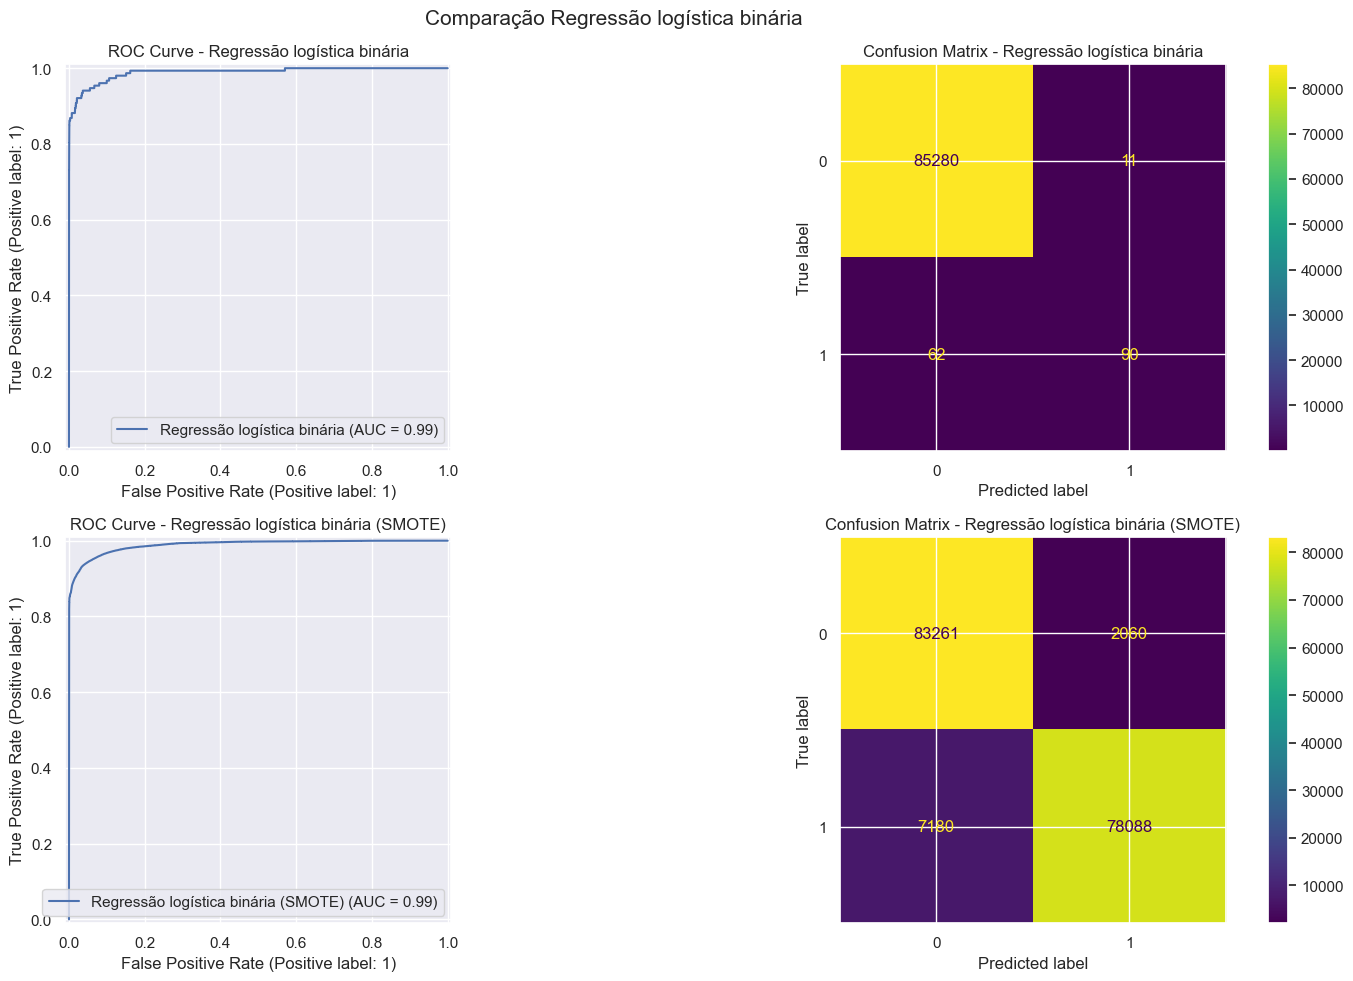

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle('Comparação Regressão logística binária', fontsize=15)

RocCurveDisplay.from_estimator(lr, X_test, y_test, name='Regressão logística binária', ax=ax[0][0])
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, ax=ax[0][1]);
ax[0][0].set_title('ROC Curve - Regressão logística binária')
ax[0][1].set_title('Confusion Matrix - Regressão logística binária')

RocCurveDisplay.from_estimator(lr_smote, X_test_smote, y_test_smote, name='Regressão logística binária (SMOTE)', ax=ax[1][0])
ConfusionMatrixDisplay.from_estimator(lr_smote, X_test_smote, y_test_smote, ax=ax[1][1]);
ax[1][0].set_title('ROC Curve - Regressão logística binária (SMOTE)')
ax[1][1].set_title('Confusion Matrix - Regressão logística binária (SMOTE)')

fig.tight_layout()

In [54]:
print('Regressão logística binária \n', classification_report(y_test, y_pred_lr, digits=4))
print()
print('Regressão logística binária (SMOTE)\n', classification_report(y_test_smote, y_pred_lr_smote, digits=4))

Regressão logística binária 
               precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     85291
           1     0.8911    0.5921    0.7115       152

    accuracy                         0.9991     85443
   macro avg     0.9452    0.7960    0.8555     85443
weighted avg     0.9991    0.9991    0.9991     85443


Regressão logística binária (SMOTE)
               precision    recall  f1-score   support

           0     0.9206    0.9759    0.9474     85321
           1     0.9743    0.9158    0.9441     85268

    accuracy                         0.9458    170589
   macro avg     0.9475    0.9458    0.9458    170589
weighted avg     0.9474    0.9458    0.9458    170589



**Interpretação e Comparação**

**Precisão (Precision):**

- O modelo sem SMOTE tem uma precisão muito alta para a classe 0 (0.9993) e uma precisão alta para a classe 1 (0.8911). Com SMOTE, a precisão para a classe 0 diminui (0.9206), enquanto a precisão para a classe 1 aumenta significativamente (0.9743).

**Recall (Sensibilidade):**

- O recall para a classe 1 no modelo sem SMOTE é moderado (0.5921), enquanto o recall para a classe 0 é quase perfeito (0.9999). Com SMOTE, o recall para a classe 1 aumenta para 0.9158, e o recall para a classe 0 permanece elevado em 0.9759.

**F1-Score:**

- O F1-score para a classe 1 no modelo sem SMOTE é relativamente baixo (0.7115), indicando um equilíbrio moderado entre precisão e recall. Com SMOTE, o F1-score para a classe 1 melhora significativamente para 0.9441. O F1-score para a classe 0 diminui ligeiramente de 0.9996 para 0.9474 com SMOTE, mas ainda é alto.

**Acurácia (Accuracy):**

- A acurácia global do modelo sem SMOTE é maior (0.9991) em comparação ao modelo com SMOTE (0.9458). A diferença na acurácia se deve principalmente ao desempenho superior do modelo sem SMOTE na classe majoritária.

**Métricas Macro e Weighted Average:**

- As médias macro e ponderadas (weighted avg) para o modelo com SMOTE são mais equilibradas (todas acima de 0.9458), indicando um desempenho geral melhor na identificação de ambas as classes. No modelo sem SMOTE, a média macro é menor, especialmente em recall e F1-score, refletindo o desempenho inferior na classe minoritária.

**Conclusão**

O modelo de regressão logística binária com SMOTE apresenta um desempenho muito mais equilibrado entre as classes, especialmente na classe minoritária (classe 1), onde a precisão, recall e F1-score melhoram significativamente. Embora a acurácia geral do modelo com SMOTE seja menor, as métricas de precisão, recall e F1-score indicam que ele é muito mais eficaz em identificar corretamente ambas as classes. O uso do SMOTE melhora significativamente a capacidade do modelo de lidar com o desbalanceamento das classes, resultando em um desempenho global mais equilibrado e robusto.

## Conclusão

**Impacto do SMOTE:**

- O uso do SMOTE melhora significativamente o desempenho dos modelos na classe minoritária, aumentando a precisão, recall e F1-score dessa classe em todos os modelos testados.

- Embora a acurácia global possa ser ligeiramente menor com SMOTE, o equilíbrio entre as classes e a capacidade de identificar corretamente a classe minoritária melhoram drasticamente.

**Desempenho por Modelo:**

- Random Forest e Neural Net Binary Classifier com SMOTE são os mais eficazes em termos de equilíbrio entre precisão e recall para ambas as classes, apresentando métricas quase perfeitas.

- Naive Bayes mostra a maior variação entre o desempenho sem SMOTE e com SMOTE, passando de muito pobre na classe minoritária para bastante equilibrado.

- Regressão Logística também se beneficia significativamente do SMOTE, mas não tanto quanto Random Forest e Neural Net.


O uso de técnicas como SMOTE em combinação com algoritmos de aprendizado de máquina robustos como Random Forest e Neural Net Binary Classifier é altamente eficaz. Esses modelos oferecem um excelente equilíbrio entre precisão e recall, garantindo a correta identificação das classes minoritárias sem sacrificar significativamente a acurácia global.

## Referências

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud